<a href="https://colab.research.google.com/github/WINIRAIS/ADA-Informes/blob/main/CuttingRod.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Problema de Corte de varillas


**Problema**: Encontrar la combinación de $n$ cortes para obtener el mayor precio.\
**Entrada**: Una secuencia de tamaño N que contiene los precios  $[a_1,a_2,...,a_n]$ además contiene el largo de la varilla lo asociamos con "$n$".\
**Salida** : Los cortes necesarios para obtener el precio mayor , es decir retorna 2 valores, los cortes y el precio que adquiere.

![image](https://www.codesdope.com/staticroot/images/algorithm/rod1.png
)

# 2. Cutting Rod

El siguiente código muestra la implementación del **Cutting Rod**


# 2.1. Código

In [12]:
# Librerías a utilizar
import random as rd
from termcolor import colored
import matplotlib.pyplot as plt
from numpy import copy
import datetime
from timeit import repeat
Minimo = -9999999

#**Cutting Rod Bottom-up**

In [2]:
#Precios 
def Generador_de_precios(N):
  A = []
  prev = 0
  for i in range(N):
    r = rd.randint(0,10)
    A.append(prev+r)
    prev+=r
  return A

In [47]:
#Cutting Rod Bottom-Up
def cuttingRodButtom(p,n):
  global retorno
  global contador
  global verbose

  for j in range(1,n+1):
    q = Minimo
    if verbose: print(colored(f"VARA DE LARGO {j}","green"))

    for i in range(j):
      if verbose:
        if j-i-1 == 0:print(colored(f"Vara completa =","red"),p[i])
        else:
          print(colored(f"Cortes {i+1} / {j-i-1} =","blue"), p[i] + retorno[j-i-1])

      q = max(q, p[i] + retorno[j-i-1])  #se obtiene el máximo valor
      contador += 1

    retorno[j] = q   #se almacena el máximo valor
    if verbose: print(colored(f"Máximo de vara de largo {j} →","yellow"),retorno[j],"\n")

  return retorno[n]

In [60]:
#Main Bottom-Up
p = Generador_de_precios(10)
n = rd.randint(1,10)

retorno = [0]*(n+1)
verbose = False
contador = 0
print(colored(f"Lista de precios:","red"),p)
print(colored("Largo de Vara:","red"),n,"\n")
print(colored(f"Precio máximo de la vara: ","blue"),"$", cuttingRodButtom(p,n))


Lista de precios: [2, 11, 17, 19, 25, 30, 32, 40, 45, 47]
Largo de Vara: 10 

Precio máximo de la vara:  $ 56


**$Verbose = True$**

In [52]:
p = Generador_de_precios(10)
n = rd.randint(1,10)
retorno = [0]*(n+1)
verbose = True
contador = 0
print(colored(f"Lista de precios:","red"),p)
print(colored("Largo de Vara:","red"),n,"\n")
print(colored(f"Precio máximo de la vara","blue"),"$", cuttingRodButtom(p,n))
print(colored(f"Cantidad de subproblemas:", "red"), contador)

Lista de precios: [8, 17, 25, 32, 37, 37, 42, 48, 52, 61]
Largo de Vara: 3 

VARA DE LARGO 1
Vara completa = 8
Máximo de vara de largo 1 → 8 

VARA DE LARGO 2
Cortes 1 / 1 = 16
Vara completa = 17
Máximo de vara de largo 2 → 17 

VARA DE LARGO 3
Cortes 1 / 2 = 25
Cortes 2 / 1 = 25
Vara completa = 25
Máximo de vara de largo 3 → 25 

Precio máximo de la vara $ 25
Cantidad de subproblemas: 6


# **Cutting Rod Recursivo**

In [53]:
#Cutting Rod Recursivo
def cuttingRodRecursive(p,n):
  global contRec
  contRec += 1

  if n <= 0:
    return 0

  q = Minimo
  for i in range(0,n):
    q = max(q, p[i]+cuttingRodRecursive(p,n-i-1)) #llamada recursiva, donde va dejando el valor máximo en q

  return q

In [76]:
#Main Recursivo
p = Generador_de_precios(10)
n = rd.randint(1,10)
contRec = 0
print(colored(f"Lista de precios:","red"),p)
print(colored("Largo de Vara:","green"),n,"\n")
print(colored(f"Precio máximo de la vara de largo {n}:","red"), cuttingRodRecursive(p,n))
print(colored(f"Llamadas Recursivas:", "blue"), contRec)

Lista de precios: [3, 4, 5, 13, 18, 26, 34, 35, 35, 37]
Largo de Vara: 5 

Precio máximo de la vara de largo 5: 18
Llamadas Recursivas: 32


# 2.2. Descripción del algoritmo

Este algoritmo nos puede solucionar el problema de encontrar los cortes necesarios para logra conseguir el mayor precio, respecto a sus cortes como se vio anteriormente.

Nos dan una barra de longitud n y un arreglo con sus precios respectivos a los cortes de la varilla.

Necesitamos determinar el valor máximo que se puede obtener cortando la varilla, se debe tener en cuenta de que debemos observar todos los casos posibles de los cortes, y de sus precios, con ello si sabemos que nuestra varilla es de largo $n$, entonces el total de combinaciones posibles seria de $2^{n-1}$.

![](https://www.programmerclick.com/images/564/b4e504163cb70924ef094e37184ca85c.png)

#Bottom-up
La variante Bottom-Up implementa el algoritmo CuttingRod con programación dinámica.\
La programación dinámica se caracteriza en resolver los problemas dados de manera más eficiente, reutilizando cálculos hechos anteriormente, para obtener los casos futuros, en base a estos resultados pasados.

Se van guardando los resultados desde el caso base, hasta el caso que se está buscando.
![image](https://i.imgur.com/yThh6bR.png)

Como se nos muestra en la imagen anterior

Se nos da $F_0$ inicial, y con ese valor se calcula el siguiente caso, $F_1$.
Con esos 2 valores se puede conseguir $F_2$ como muestra la imagen\
y como $F_2$ mantiene los valores de $F_0$ y $F_1$, $F_3$ se obtiene con esos mismos valores.\
se sigue repitiendo lo mismo hasta llegar al caso esperado, todo mediante los resultados anteriores.


###**Recursivo**
Este método a diferencia de bottom-up no me guardara los valores , sino que calculara todo los casos posibles, provocando así que no sea recomendable utilizarlo para estos casos, ya que su complejidad es bastante alta, en cambio bottom-up guarda los resultando ahorrando asi los cálculos, de todas formas si es conveniente hacer uso de el en otros casos.

El algoritmo encuentra el máximo, comparando la vara completa con todos los posibles casos.
Se tiene la lista de precios **$P$** de largo **$N$**.


*  La vara entera, sin cortes, tiene el precio completo de la vara $P_n$
*   Se deben revisar todos los casos con cortes, por lo que se van a ir comprobando, cortándolos con un índice $i$.\
El corte hecho se ve representado como $P_i+r_{n-i}$.
*  se busca el valor mayor es decir $P_n$ o $P_i+r_{n-i}$.

El número de cortes como se había dicho anteriormente es de $2^{n-1}$ lo que provoca que su complejidad sea **$O(2^{n-1})$**.


![image.png](https://docs.google.com/drawings/d/e/2PACX-1vS1PepvvczFdDNgTY9wP-LyEi5-n8mfg1q1xHeb6ycteXqI0N9vmGjkGG3PI3595JDBChGJeYrVGYP7/pub?w=785&h=407)


#2.3.  Ejemplo

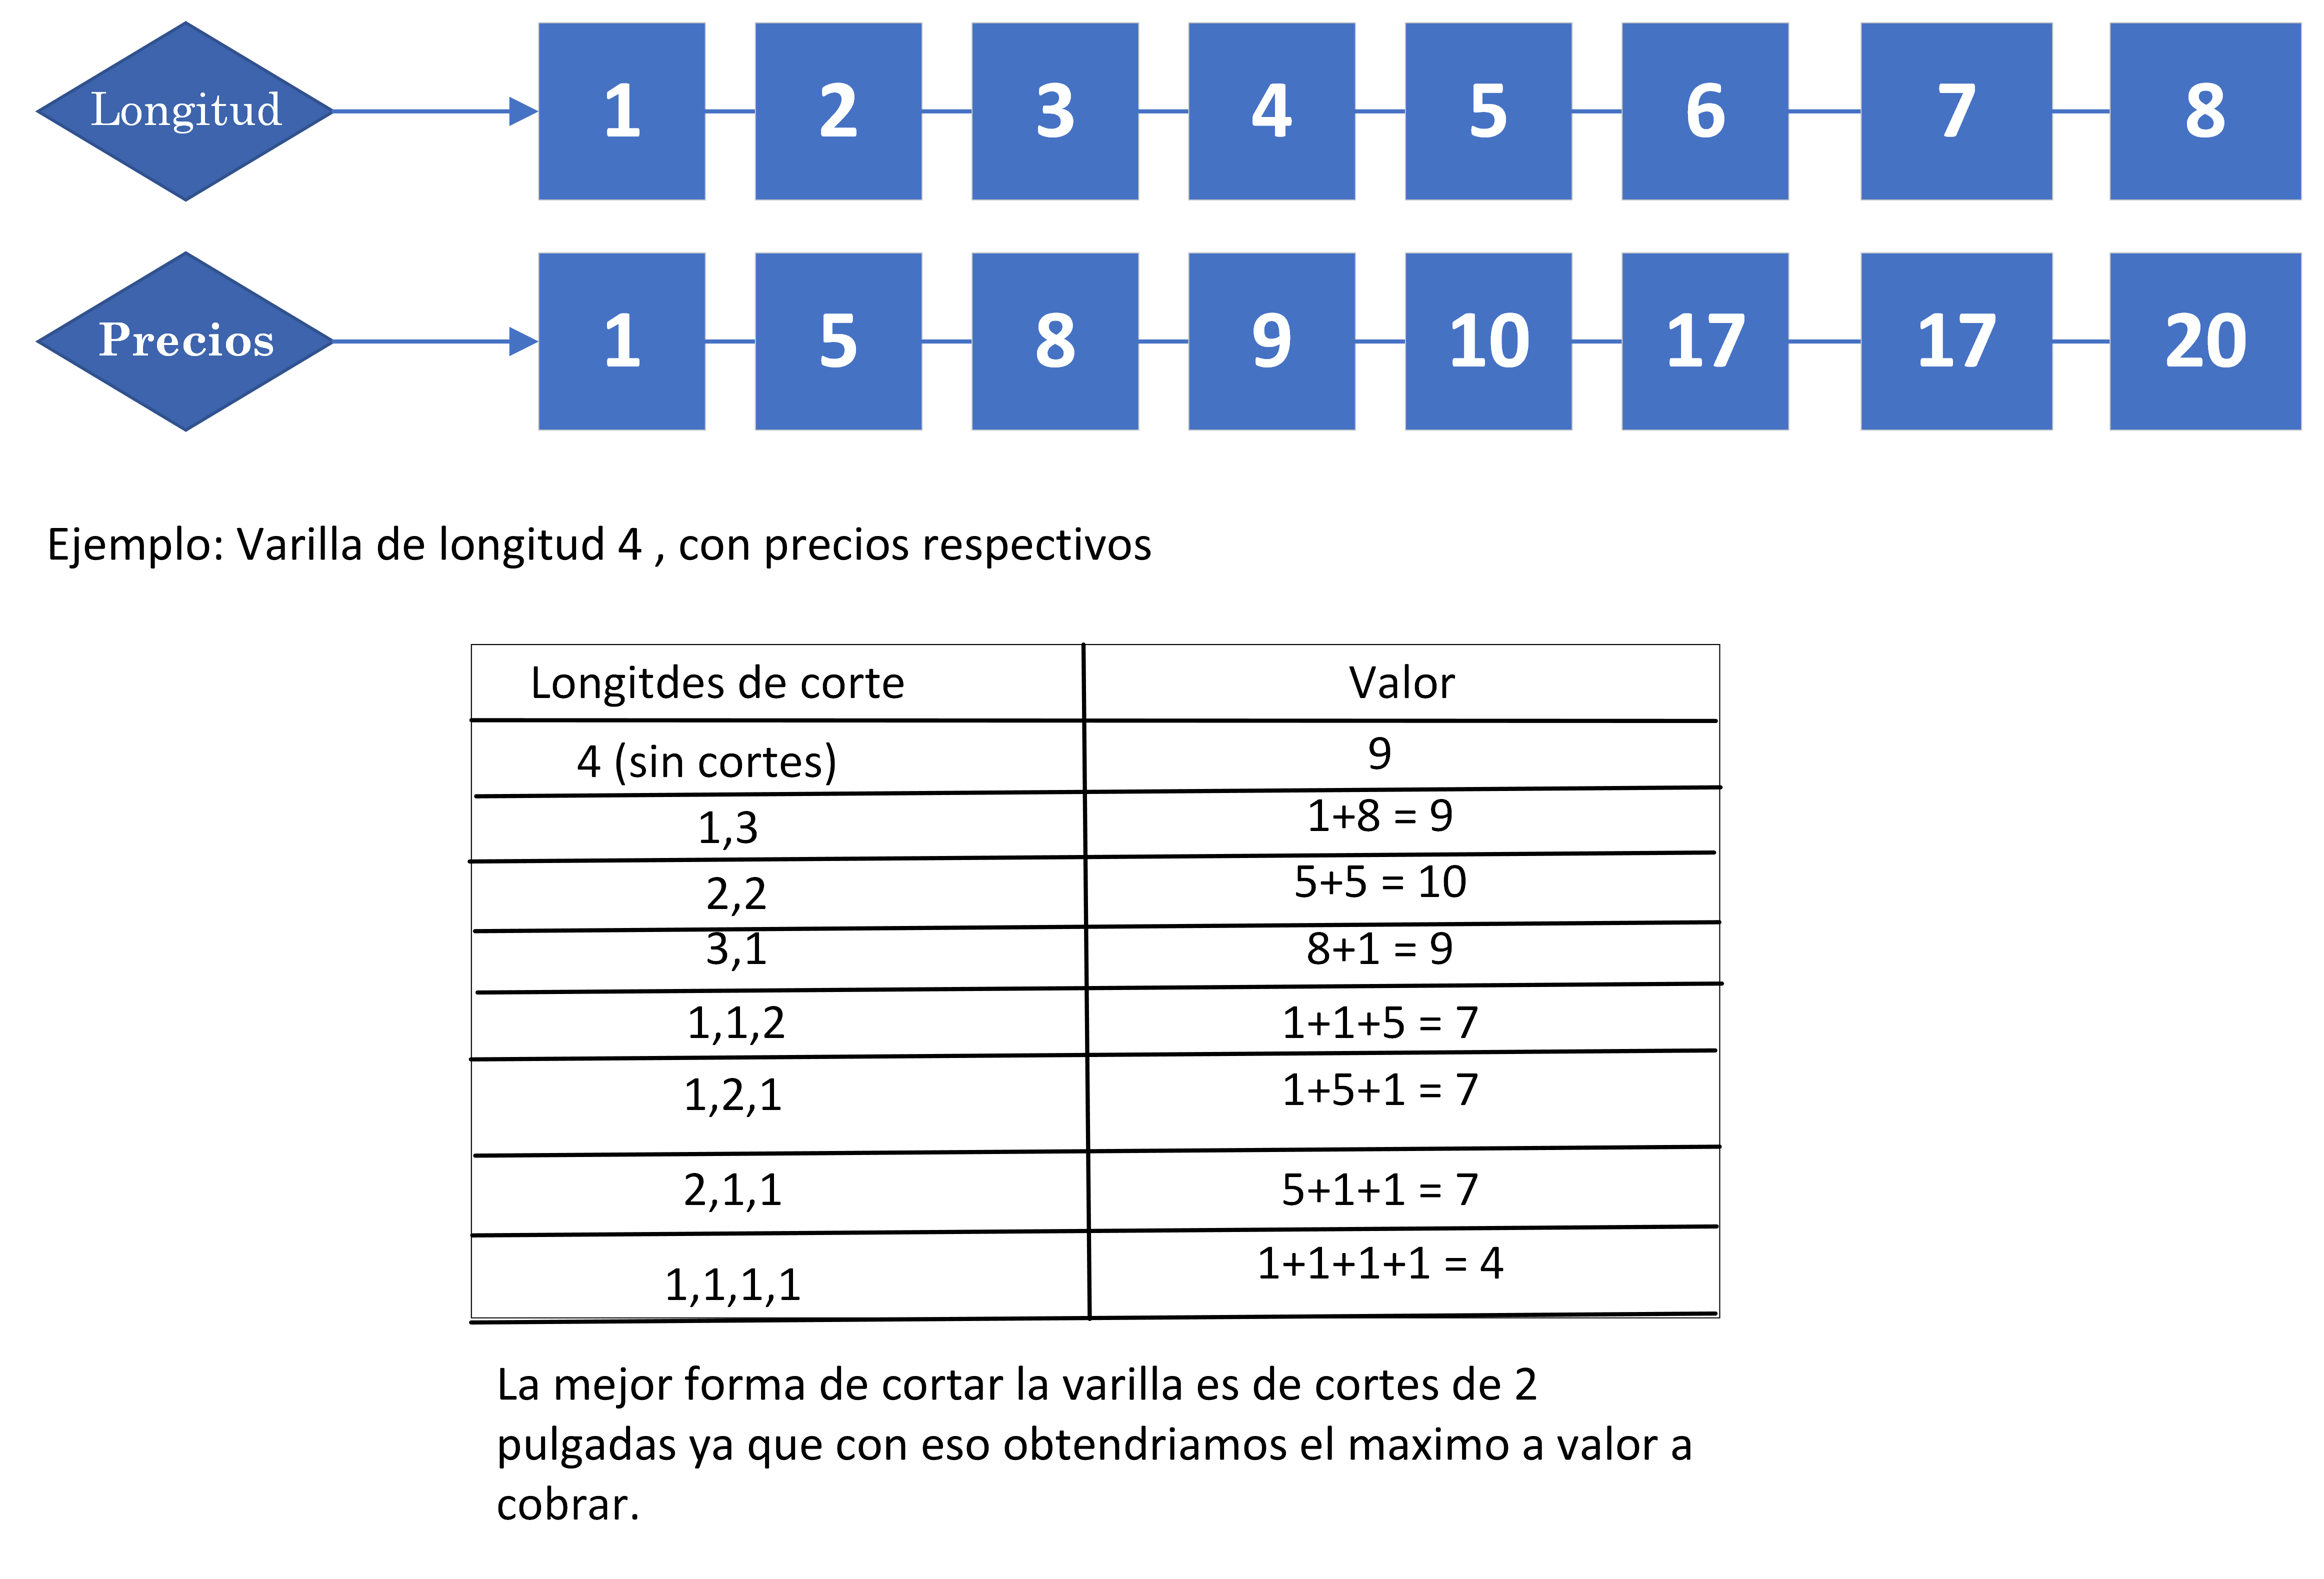

Cabe destacar que en el ejemplo anterior la varilla es de 8 pulgadas, pero en el ejemplo se utiliza una de 4 adquiriendo los mismo valores de precios respectivos.


# 3. Correctitud (Bottom-Up)

###**Inducción Matemática**
Probaremos que el algoritmo CuttingRod Bottom-Up es correcto. Para esto utilizaremos inducción matemática.

**Hipótesis**  
El algoritmo CuttingRod recibe una lista de precios $[a_1 \leq a_2 \leq ... \leq a_n]$ y un índice $i$, con  $1 \leq i \leq n$, y retorna el valor máximo posible para la vara de largo $i$.

A fin de probar si es correcto el algoritmo, es necesario estudiar lo que ocurre en dos casos específicos:
1. **Caso Base:** Cuando $i=1$.
2. **Caso General:** Cuando $i = m$, con $ 1 < m \leq n$.

**Caso Base:**  
En el caso base, sabemos que el largo de la vara a calcular es de largo $1$, esto quiere decir que no se podrá cortar de ninguna forma posible, entonces tenemos un sólo caso, y este es que el valor máximo corresponde a la vara completa.

**Caso General:**  
Lo que ocurre en varas de largo $m$, es que se usan los precios máximos de casos más pequeños para calcular el actual, y estos casos anteriores son los máximos posibles para cada largo respectivo, esto quiere decir que si usamos estos resultados, podemos obtener el valor máximo de la vara actual.  
Con la vara de largo $2$, tenemos que ver cuál confguración tiene mayor valor, la vara completa de largo $2$ o dos varas de largo $1$.  
Lo mismo ocurre con la vara de largo $3$, $4$ con sus combinaciones respectivas, y así hasta $m$ y $n$.  

Con esto en mente, podemos afirmar que el algoritmo es correcto en varas de largo $m$, por lo tanto, también lo es con varas de largo $n$, es decir, que nuestra hipótesis es correcta.

###**Complejidad Temporal**
**Hipótesis**  
Complejidad Temporal $→ O(n^2)$  

Si consideramos $n$ como el largo de la vara a la cuál queremos buscar el valor máximo posible, debemos comparar los precios de las combinaciones posibles para cada largo desde $1$ a $n$.

Esto nos da lo siguiente:  
- $\sum\limits_{j=1}^{n}\sum\limits_{i=0}^{j}C$
- $C \cdot \sum\limits_{j=1}^{n}j$
- $C \cdot (n(n+1))/2$
- $C \cdot (n^2 + n)/2$

Si lo extrapolamos al tiempo de ejecución de un algoritmo, debemos eliminar constantes, y quedarnos con el polinomio de mayor grado.  
Haciendo esto, nos encontramos que el tiempo de ejecución es efectivamente el que pensabamos.

**Tiempo de ejecución $→ O(n^2)$**

###**Complejidad Espacial**
Al estar analizando la variante implementada con programación dinámica, sabemos que este método va almacenando los resultados de los subproblemas, esto quiere decir que necesitamos utilizar memoria adicional para que Cutting Rod funcione correctamente.  
Si estamos buscando el valor máximo de una vara de largo $n$, entonces se necesita guardar el precio de cada largo a calcular, en resumen, se deben almacenar $n$ resultados, es por esto que se necesita un arreglo auxiliar de largo $n$.

**Memoria adicional necesaria** → $O(n)$ 

# 5. Experimentos


# 5.1. Tiempo de ejecución(experimental)
En el siguiente gráfico se reporta el tiempo de ejecución del algoritmo **cuttingRodButtom** vs **cuttingRodRecursive** en función del tamaño del problema para generar precios en un rango de  $1$ y $30$.

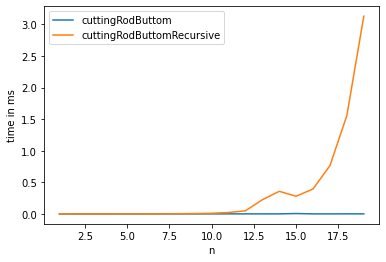

In [82]:
x=[]; y=[]; y2=[]

verbose = False
for n in range(1,20):
  
  p = Generador_de_precios(n)

  t = repeat(setup="from __main__ import cuttingRodButtom", stmt=f"cuttingRodButtom({p},{n})", repeat=1, number=10)
  t2 = repeat(setup="from __main__ import cuttingRodRecursive", stmt=f"cuttingRodRecursive({p},{n})", repeat = 1, number = 10)

  x.append(n)
  y.append(t)
  y2.append(t2)


plt.plot(x,y)

plt.plot(x, y2)
plt.legend(["cuttingRodButtom", "cuttingRodButtomRecursive"])

plt.xlabel('n')
plt.ylabel('time in ms')
plt.show()

##**Analisis**
Se puede observar claramente que el mejor caso es el del bottom-up ya que el tiempo en el caso recursivo se dispara en cambio con la programación dinámica es mucho más estable, de todas formas era de esperarse un resultado como eso por , la complejidad mencionada anteriormente.


# 5.1. **SubProblemas de Bottom-Up**
Analizaremos lo que ocurre cuando el problema va creciendo.  
¿Que ocurre cuando se tiene una lista de precios de largo $50$, o incluso $200$?  
¿Cómo se comportará el algoritmo?  
¿Cuántos subproblemas se deben resolver en cada caso?

Para generar este gráfico y resolver nuestras dudas, se usarán listas de precio de largo $n \in [1,500]$, y se buscará el valor máximo de una vara de largo $i \in [1,n]$.

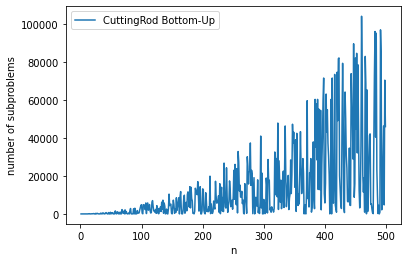

In [61]:
x=[]; y=[]

verbose = False
for n in range(1,500):
  contador = 0
  retorno = [0]*(n+1)
  p = Generador_de_precios(n)
  i = rd.randint(1,n)
  
  cuttingRodButtom(p,i)

  y.append(contador)
  x.append(n)

plt.plot(x,y)

plt.legend(["CuttingRod Bottom-Up"])

plt.xlabel('n')
plt.ylabel('number of subproblems')
plt.show()

Calculamos anteriormente que el tiempo de ejecución del algoritmo CuttingRod implementado con programación dinámica (Bottom-Up) es de $O(n^2)$.  
En el gráfico se ve que hay muchos casos diferentes, con un amplio umbral de posibilidades, pero esto se debe a que se calculan largos de varas aleatorios, desde $0$ hasta $n$, pero igualmente podemos darnos cuenta de la cantidad de subproblemas que se solucionan si se toman en cuenta los mayores resultados, y es posible advertir que el crecimiento del gráfico es lineal, y crece a la misma velocidad que $n$. Esto es porque la cantidad de subproblemas presentes en un caso es la misma que el largo del problema, es decir, $n$.